# Data Science Component
## Goals:
- Ingest data
- Analyse data
  - Distributions
  - NaNs and Nulls
  - Where to impute and where we might need particular transforms
- Process data
  - Create pipeline for doing the required transforms
  - Encoding data (for real time use case)
  - Separate file to ensure standardisation and reproducability 
- Train model
  - Potentially make a baseline model performing logistic regression
  - Select a model for the task (ideally one with explainability)
  - Hyperparameter tune the model
  - Save the model
- Conclude Data Science component and move onto model serving and dockerisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from interpret.glassbox import ExplainableBoostingClassifier # our model
from interpret import show
import pickle # to save the model

# custom helpers
from helpers.processing import process_columns, encode_data


In [2]:
data = pd.read_csv("./data/bank-additional-full.csv", delimiter=';')

In [3]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.isnull().sum() # no nulls in our data set

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

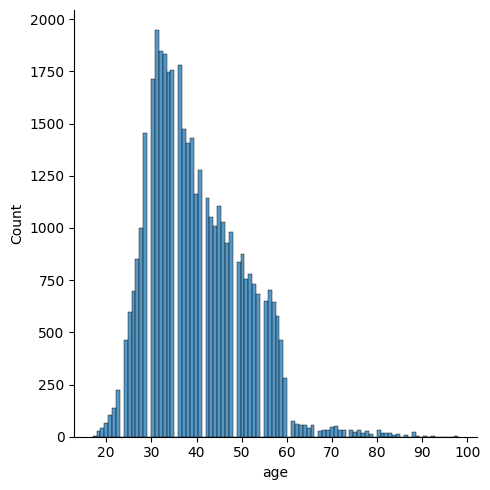

In [5]:
# Distribution of age of the clients
sns.displot(data['age'])

In [6]:
# What type of job do the clients have
data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

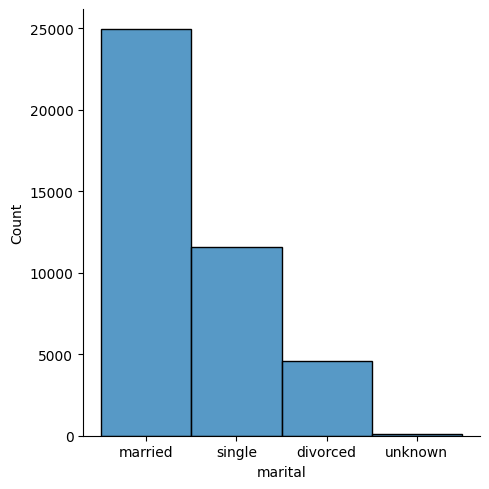

In [7]:
# What is the marital status
sns.displot(data['marital'])

In [8]:
# How much education do they have?
data['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

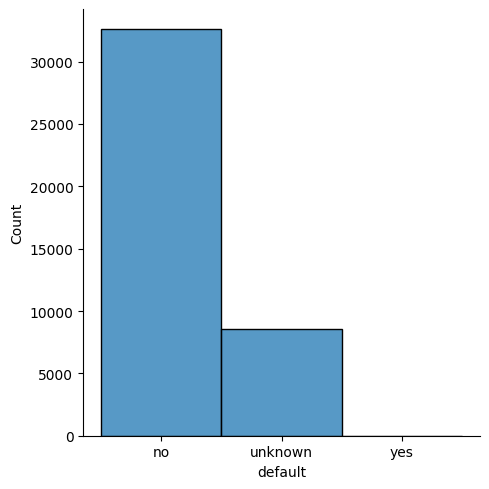

In [9]:
# Do they have a credit default ?
sns.displot(data['default'])

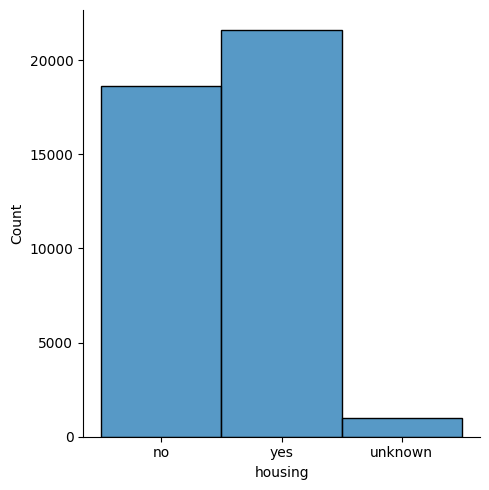

In [10]:
# Do they have a housing loan
sns.displot(data['housing'])

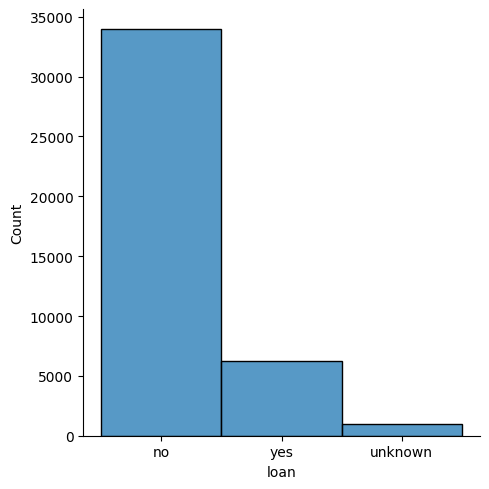

In [11]:
# Do they have a personal loan
sns.displot(data['loan'])

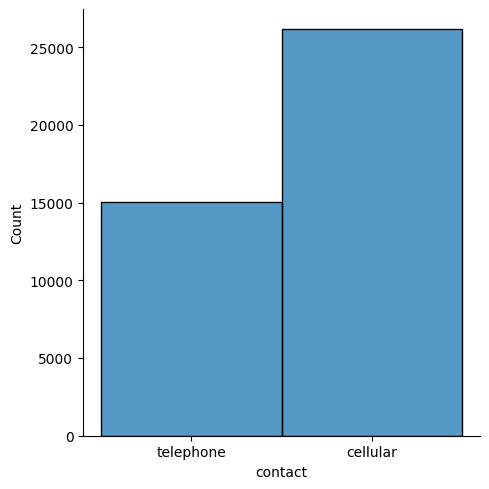

In [12]:
# How do we contact them - their communication mode shared
sns.displot(data['contact'])

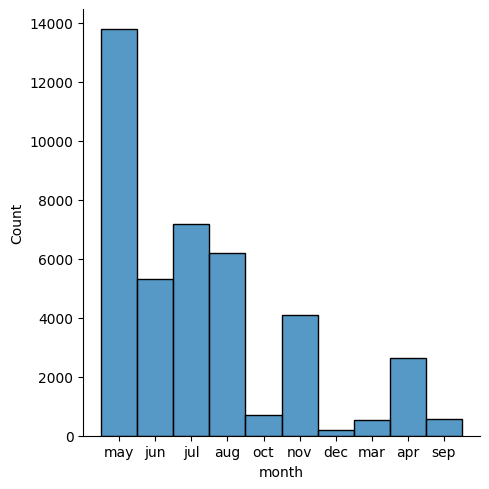

In [13]:
# When was the last month we contacted them
sns.displot(data['month'])

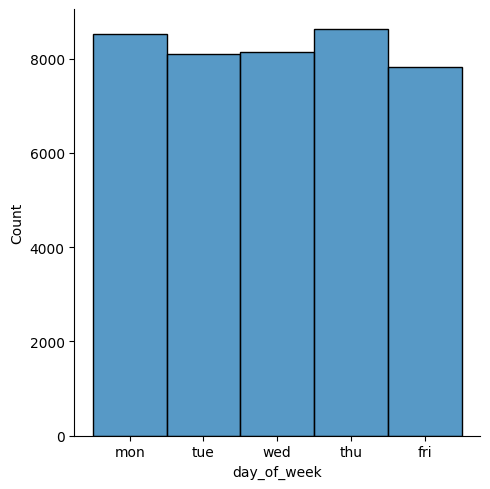

In [14]:
# What day of the week did we contact them on ?
sns.displot(data['day_of_week'])

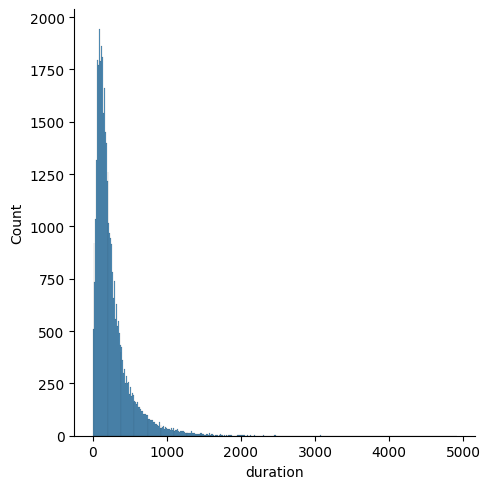

In [15]:
# How long did the contact last in seconds
sns.displot(data['duration'])

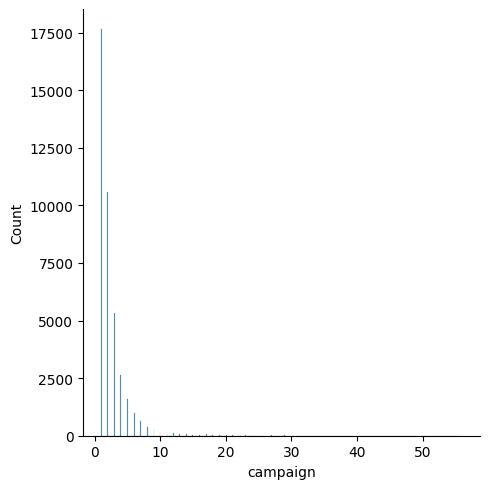

In [16]:
# How many times did we contact them in this campaign
sns.displot(data['campaign'])

Index([999,   3,   6,   4,   9,   2,   7,  12,  10,   5,  13,  11,   1,  15,
        14,   8,   0,  16,  17,  18,  22,  19,  21,  25,  26,  27,  20],
      dtype='int64', name='pdays')

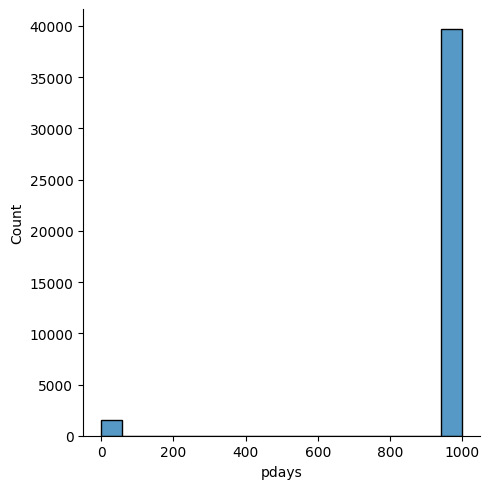

In [17]:
# Number of days since we last contacted this client in our prior campaigns - NB 999 indicated no prior contact
sns.displot(data['pdays'])
data['pdays'].value_counts().index # 27 is the latest date someone last got contacted 

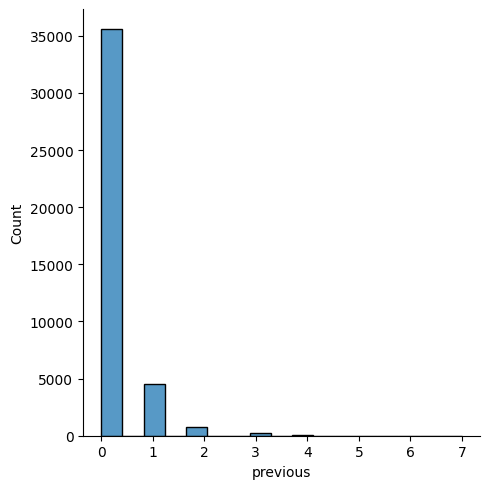

In [18]:
# How many contacts have we had prior to this campaign
sns.displot(data['previous'])

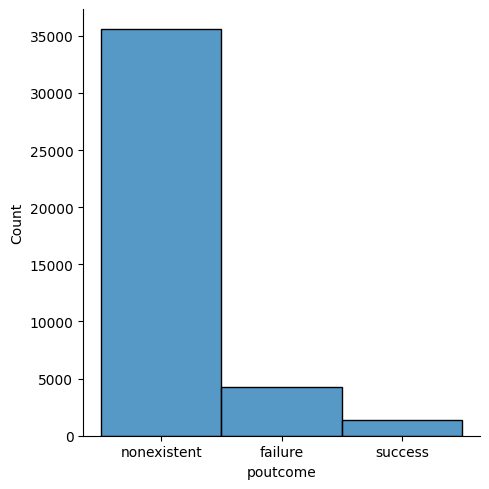

In [19]:
# What was the outcome in  the previous marketing campaign
sns.displot(data['poutcome'])

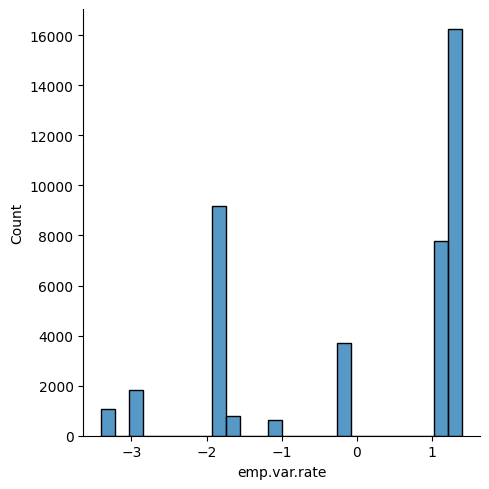

In [20]:
sns.displot(data['emp.var.rate']) # new data that was note described in the data set

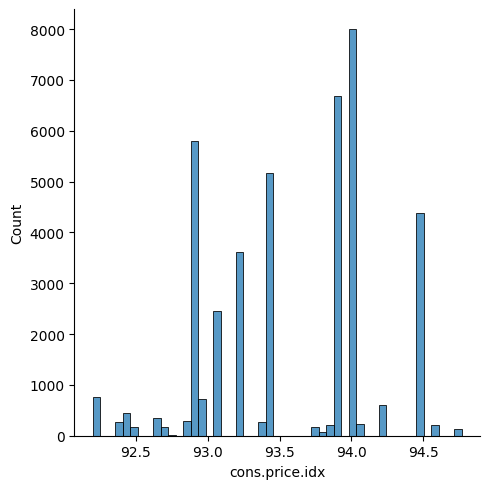

In [21]:
sns.displot(data['cons.price.idx']) # new data that was note described in the data set

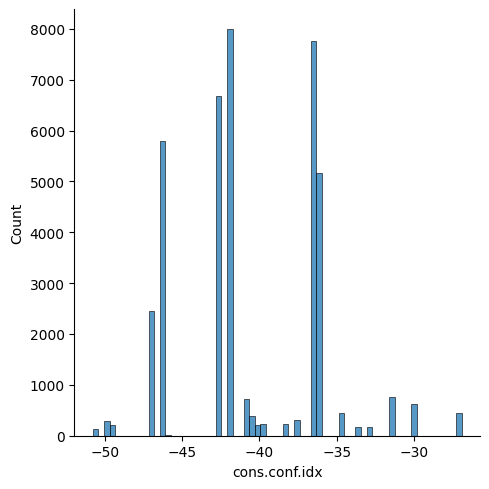

In [22]:
data['cons.conf.idx'].value_counts() # new data that was note described in the data set
sns.displot(data['cons.conf.idx']) # new data that was note described in the data set

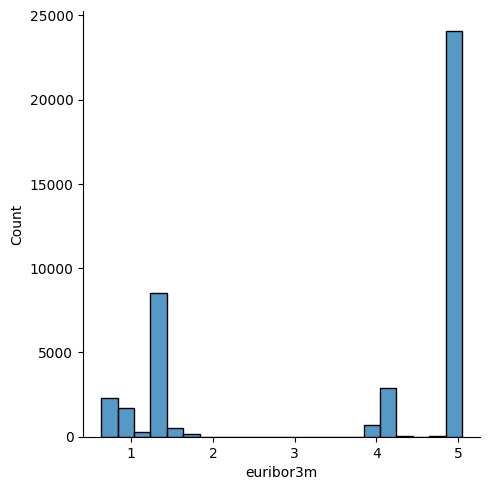

In [23]:
sns.displot(data['euribor3m']) # new data that was note described in the data set

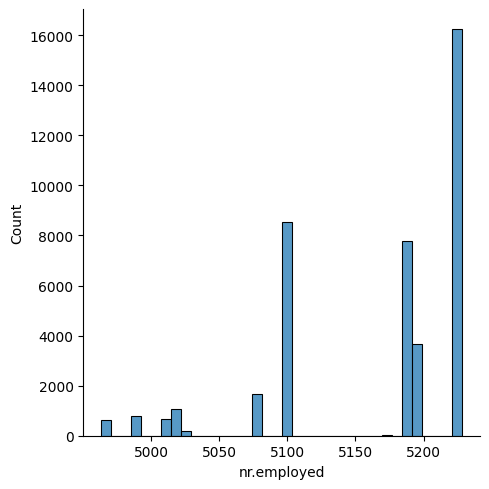

In [24]:
sns.displot(data['nr.employed']) # new data that was note described in the data set

In [25]:
data['y'].value_counts() # Did the client subscribe to the deposit we promoted ?

y
no     36548
yes     4640
Name: count, dtype: int64

## Takeaways:
- Most of the clients are 20-50 range, so the bank does not have a large number of young or old clients.
- The jobs that the clients work are relatively diversified and cover a broad segment of society e.g. house cleaners to entrepreneurs and administrative staff. 
- Most of the cliental are married although there are significant number which are single or divorced. The unknown category is a bit of an issue, although this could likely be imputed. Then at runtime if unknown we use the same model for imputation to ensure consistency.
- Most people have not defaulted, there are only three cases of "yes" we may want to get the yes category out here as there are too few examples to learn from.
- The number of people with a housing loan is similar to the number of people without one, although we have a much more significant number of people who are "unknown" this may be improved later and be imputed - similar to unknown for marriages. 
- There seems to be a few months of the year where very little outreach happens with clients, although questionable, it may be worthwhile to have an "Other" category to coalesce these.
- The distribution of time spent talking to clients is strongly skewed to the right, we will use gradient boosting here but if we did not, then a box-cox transform would be beneficial. The same is true for campaign.
- The Pdays are divided, so we may want to make a simple 2 category where one is less than a certain value, the other is greater than a certain value - but this is probably not beneficial as the value counts here would reveal that the 999 category related to those who have not been contacted. So we can potentially leave this as 999 is an indicator already. Hence, we may also want to bin the data but this is dependent. 
- Previous contacts are heavily biased to 0, which is logical as many clients have the 999 category. We may want to make this a categorical variable and encode it e.e.g as int classes and for anything above a certain amount, then that takes on a higher value.
- For the same reasoning the poutcome has many non-existent as many of the clients are new.
- Here our target variable will be 'y' and we will assume that we want to target likely cliental.
***
## Encoding Data and Setting It Up
Note, here we will make a python file dedicated to the encoding of data. Largely because it will ensure consistency in our data.

In [26]:
dummy_cols = [
    'job', 'marital', 'default', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays', 'campaign'
]
data = process_columns(data)
data = encode_data(data, dummy_cols)
data.to_csv("./data/processed.csv")

## Creating Our Model
- Here we will set aside 20% of the data using stratified sampling to build our model.
- Given the low number of cases we will compare using the data set as it is, versus one which uses ADASYN.
- We can also try and use an explainable AI model here to see how well it performs and then understand its reasoning when polled about a particular client.
  - This is important as we may want to overrule the model.

In [27]:
y = data['y']
data = data.drop('y', axis=1)
X = data.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
ebm = ExplainableBoostingClassifier()
ebm.fit(data, y)
show(ebm.explain_global())

/home/matthew/anaconda3/envs/demo/lib/python3.9/site-packages/interpret/visual/_udash.py:117: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/matthew/anaconda3/envs/demo/lib/python3.9/site-packages/interpret/visual/_udash.py:117: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<!-- http://127.0.0.1:7575/140002383460720/ -->

In [29]:
y_preds = ebm.predict(X_test)

In [31]:
confusion_matrix(y_test, y_preds)

array([[6861,  227],
       [ 431,  718]])

In [30]:
f1_score(y_test, y_preds)

0.6857688634192932

In [32]:
recall_score(y_test, y_preds)

0.6248912097476066

In [36]:
with open('./model/ebm_model.pkl', 'wb') as file:
    pickle.dump(ebm, file)